Name: Amit Bazarh (6897044)

Models: 
1. Logistic Regression (Unique)
2. Random Forest (Same as Group Members)

LOGISTIC REGRESSION--------------------------------------------------------------------------------------------------------------------------

Importing the Necessary Libraries  

In [1]:
#Importing the pandas library for data handling, the numpy library for operations and the matplot library for plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing sklearn libraries for modelling with Logistic Regression and Random Forest 
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier

#Importing the library needed for splitting the data into training & testing 
from sklearn.model_selection import train_test_split  

#Importing the evaluation metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

Loading & Validating Data

In [4]:
#Loading in the cleaned/prepared dataset from the data pre-processing step and assigning it to a dataframe 'loanData' 
loanData = pd.read_csv('cleanLoanData.csv')
loanData.head()

,Income,Age,Experience,Married.Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,...,ProfessionScientist,ProfessionSecretary,ProfessionSoftware_Developer,ProfessionStatistician,ProfessionSurgeon,ProfessionSurveyor,ProfessionTechnical_writer,ProfessionTechnician,ProfessionTechnology_specialist,ProfessionWeb_designer
0,1303834,23,3,0,1,0,Mechanical_engineer,Madhya_Pradesh,3,13,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,0,1,0,Software_Developer,Maharashtra,9,13,...,0,0,1,0,0,0,0,0,0,0
2,3991815,66,4,1,1,0,Technical_writer,Kerala,4,10,...,0,0,0,0,0,0,1,0,0,0
3,6256451,41,2,0,1,1,Software_Developer,Odisha,2,12,...,0,0,1,0,0,0,0,0,0,0
4,5768871,47,11,0,1,0,Civil_servant,Tamil_Nadu,3,14,...,0,0,0,0,0,0,0,0,0,0


Iteration 1 - Single Numerical Feature Inputs

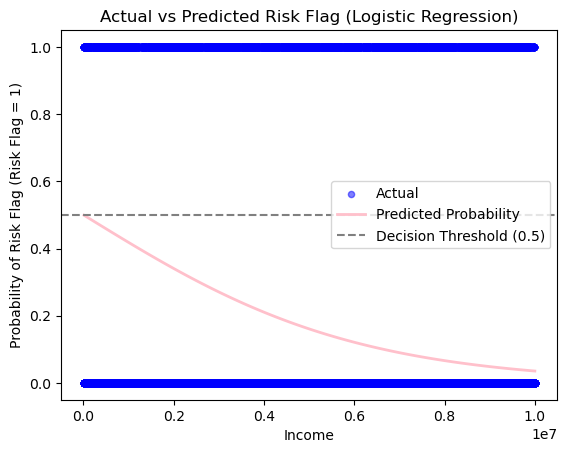

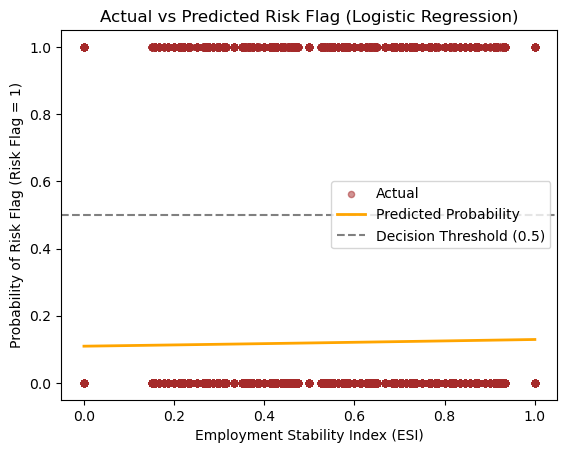

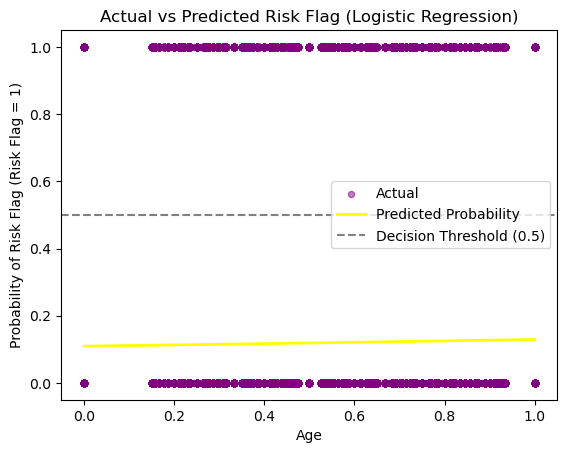

Model accuracy on test data: 0.8774867724867725


In [8]:
#Loading in the independent variable ('Income') and the proposed dependent variable ('Risk_Flag')
X = loanData[['Income']].values  # Making 'Income' a 2D array - rows represent individual loan applications, columns are features of the loan data
y = loanData['Risk_Flag'].values  # Making 'Risk_Flag' a 1D array - representing the output for each loan application 

#Splitting the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Instantiating the Logistic Regression model with the training data and fitting the model with this data
model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(X_train, y_train)

#Placing the predicted class labels and the probability of risk flag being 1 in variables 
y_pred = model_logistic_regression.predict(X_test)  
y_prob = model_logistic_regression.predict_proba(X_test)[:, 1]  

#Income range values for the prediction curve
income_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)

#Predicted probabilities for the range of income values (when Risk Flag's class assignment is 1)
prob_range = model_logistic_regression.predict_proba(income_range)[:, 1]

#Plotting Actual Risk Flag Values (Blue) vs Predicted Risk Flag Values (Red)
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5, s=20) 
plt.plot(income_range, prob_range, color='pink', label='Predicted Probability', linewidth=2) 

#Establishing a line at 0.5 for binary classification decision
plt.axhline(y=0.5, color='gray', linestyle='--', label='Decision Threshold (0.5)')

plt.title("Actual vs Predicted Risk Flag (Logistic Regression)")
plt.xlabel("Income")
plt.ylabel("Probability of Risk Flag (Risk Flag = 1)")
plt.legend()
plt.show()

#Repeating the above steps for a different input variable: ESI ---------------------------------------------------------------------------

#Loading in the independent variable ('ESI') and the proposed dependent variable ('Risk_Flag')
X2 = loanData[['ESI']].values  # Making 'ESI' a 2D array - rows represent individual loan applications, columns are features of the loan data
y2 = loanData['Risk_Flag'].values  # Making 'Risk_Flag' a 1D array - representing the output for each loan application 

#Splitting the dataset into training and testing subsets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

#Instantiating the Logistic Regression model with the training data and fitting the model with this data
model_logistic_regression2 = LogisticRegression()
model_logistic_regression2.fit(X2_train, y2_train)

#ESI range values for the prediction curve
esi_range = np.linspace(X2_test.min(), X2_test.max(), 100).reshape(-1, 1)

#Probabilities for the range of ESI values (when Risk Flag's class assignment is 1)
prob_range2 = model_logistic_regression2.predict_proba(esi_range)[:, 1]

#Plotting Actual Risk Flag Values (Blue) vs Predicted Risk Flag Values (Red)
plt.scatter(X2_test, y2_test, color='brown', label='Actual', alpha=0.5, s=20) 
plt.plot(esi_range, prob_range2, color='orange', label='Predicted Probability', linewidth=2) 

#Establishing a line at 0.5 for binary classification decision
plt.axhline(y=0.5, color='gray', linestyle='--', label='Decision Threshold (0.5)')

plt.title("Actual vs Predicted Risk Flag (Logistic Regression)")
plt.xlabel("Employment Stability Index (ESI)")
plt.ylabel("Probability of Risk Flag (Risk Flag = 1)")
plt.legend()
plt.show()

#Repeating the above steps for a different input variable: Age ---------------------------------------------------------------------------

#Loading in the independent variable ('Age') and the proposed dependent variable ('Risk_Flag')
X3 = loanData[['Age']].values  #Making 'Age' a 2D array - rows represent individual loan applications, columns are features of the loan data
y3 = loanData['Risk_Flag'].values  #Making 'Risk_Flag' a 1D array - representing the output for each loan application 

#Splitting the dataset into training and testing subsets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

#Instantiating the Logistic Regression model with the training data and fitting the model with this data
model_logistic_regression3 = LogisticRegression()
model_logistic_regression3.fit(X3_train, y3_train)

#Age range values for the prediction curve
age_range = np.linspace(X3_test.min(), X3_test.max(), 100).reshape(-1, 1)

#Probabilities for the range of Age values (when Risk Flag's class assignment is 1)
prob_range3 = model_logistic_regression3.predict_proba(age_range)[:, 1]

#Plotting Actual Risk Flag Values (Blue) vs Predicted Risk Flag Values (Red)
plt.scatter(X2_test, y2_test, color='purple', label='Actual', alpha=0.5, s=20) 
plt.plot(esi_range, prob_range2, color='yellow', label='Predicted Probability', linewidth=2) 

#Establishing a line at 0.5 for binary classification decision
plt.axhline(y=0.5, color='gray', linestyle='--', label='Decision Threshold (0.5)')

plt.title("Actual vs Predicted Risk Flag (Logistic Regression)")
plt.xlabel("Age")
plt.ylabel("Probability of Risk Flag (Risk Flag = 1)")
plt.legend()
plt.show()

#Evaluating the model based on the testing data
test_score = model_logistic_regression.score(X_test, y_test) 
print("Model accuracy on test data:", test_score)


Iteration 1 Evaluation 

In [10]:
# 1. Accuracy
it1_accuracy = accuracy_score(y_test, y_pred)
print("Iteration 1 Accuracy: ", it1_accuracy)

# 2. Confusion Matrix
it1_conf_matrix = confusion_matrix(y_test, y_pred)
print("Iteration 1 Confusion Matrix:", it1_conf_matrix)
print(it1_conf_matrix)

# 3. Precision, Recall, F1-Score
it1_precision = precision_score(y_test, y_pred, zero_division=1)
it1_recall = recall_score(y_test, y_pred)
it1_f1 = f1_score(y_test, y_pred)

print("Iteration 1 Precision:", it1_precision)
print("Iteration 1 Recall Score:", it1_recall)
print("Iteration 1 F1:", it1_f1)

Iteration 1 Accuracy:  0.8774867724867725
Iteration 1 Confusion Matrix: [[66338     0]
 [ 9262     0]]
[[66338     0]
 [ 9262     0]]
Iteration 1 Precision: 1.0
Iteration 1 Recall Score: 0.0
Iteration 1 F1: 0.0


Iteration 2 - Comprehensive Model with All Numerical Features Input  

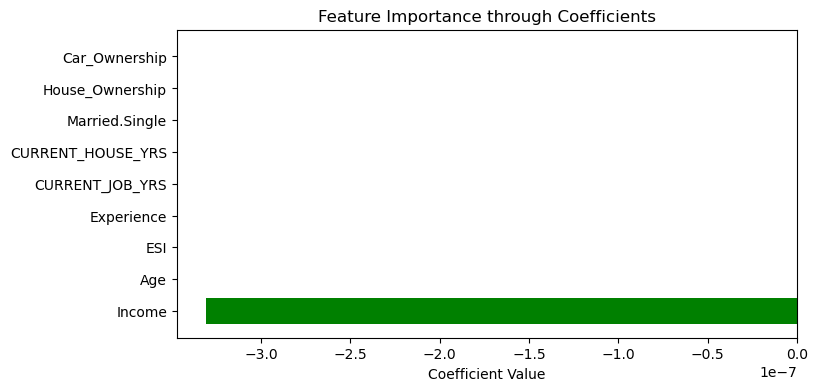

In [12]:
#Adding all the independent variables (all numerical features) to a list loading them with the proposed dependent variable ('Risk_Flag')

input_columns = ['Income', 'Age', 'ESI', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Married.Single', 'House_Ownership', 'Car_Ownership']  # List of column names for input features
X = loanData[input_columns].values 
y = loanData['Risk_Flag'].values  

#Splitting the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Instantiating the Logistic Regression model with the training data and fitting the model with this data
model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(X_train, y_train)

y_pred = model_logistic_regression.predict(X_test)  # Predicted class labels
y_prob = model_logistic_regression.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1 (Risk_Flag=1)

#Getting the coefficients of all the input features 
coefficients = model_logistic_regression.coef_[0]

#Plotting the coefficients to visualise how important each feature is in the model
plt.figure(figsize=(8, 4))
plt.barh(input_columns, coefficients, color='green')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance through Coefficients')
plt.show()


Iteration 2 Evaluation 

In [15]:
# 1. Accuracy 
it2_accuracy = accuracy_score(y_test, y_pred)
print("Iteration 2 Accuracy: ", it2_accuracy)

# 2. Confusion Matrix
it2_conf_matrix = confusion_matrix(y_test, y_pred)
print("Iteration 2 Confusion Matrix:", it2_conf_matrix)
print(it1_conf_matrix)

# 3. Precision, Recall, F1 Score 

it2_precision = precision_score(y_test, y_pred, zero_division=1)
it2_recall = recall_score(y_test, y_pred)
it2_f1 = f1_score(y_test, y_pred)
print("Iteration 2 Precision:", it2_precision)
print("Iteration 2 Recall:", it2_recall)
print("Iteration 2 F1 Score:", it2_f1)

Iteration 2 Accuracy:  0.8774867724867725
Iteration 2 Confusion Matrix: [[66338     0]
 [ 9262     0]]
[[66338     0]
 [ 9262     0]]
Iteration 2 Precision: 1.0
Iteration 2 Recall: 0.0
Iteration 2 F1 Score: 0.0


Iteration 3 - Hyperparameter Tuning for Logistic Regression 

In [17]:
#Exploring possible class imbalance in risk flag 
loanData['Risk_Flag'].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

In [19]:
#Importing the GridSearchCV library for optimising Logistic Regression Performance
from sklearn.model_selection import GridSearchCV

input_columns = ['Income', 'Age', 'ESI', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Married.Single', 'House_Ownership', 'Car_Ownership']
X = loanData[input_columns].values
y = loanData['Risk_Flag'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Changing parameters in the model to improve performance (more iterations, class balancing to avoid biases)
model_logistic_regression = LogisticRegression(
    max_iter=2000,  
    class_weight='balanced', 
    random_state=0,
)

#Hyperparameter tuning with GridSearchCV tool (Hyperparameters: regularization strength, type of regularization, solver for stability, tolerance for convergence)
param_grid = {
    'C': [0.01, 0.1, 1, 10],  
    'penalty': ['l2'],  
    'solver': ['saga'],  
    'tol': [0.001, 0.01]  
} 

#GridSearchCV characteristics (number of folds for cross-validation, optimising cores, displaying progress during execution, using ROC AUC score)
grid_search = GridSearchCV(
    model_logistic_regression,
    param_grid,
    cv=3,  
    n_jobs=-1,  
    verbose=1,  
    scoring='roc_auc'  
)

#Fitting the GridSearchCV tool on the training data 
grid_search.fit(X_train, y_train)

#Returning the best hyperparameters identified from execution
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

#Using the best hyperparameters to predict risk flag on the testing set of data (predicting the risk flag class labels and probabilities for risk flag being 1)
y_pred = best_model.predict(X_test)  
y_prob = best_model.predict_proba(X_test)[:, 1]  

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001}


Iteration 3 Evaluation 

Iteration 3 Accuracy:  0.8774867724867725
Iteration 3 Confusion Matrix: [[66338     0]
 [ 9262     0]]
[[66338     0]
 [ 9262     0]]
Iteration 3 Precision: 1.0
Iteration 3 Recall: 0.0
Iteration 3 F1 Score: 0.0
Iteration 3 ROC AUC Score: 0.5000488092432596


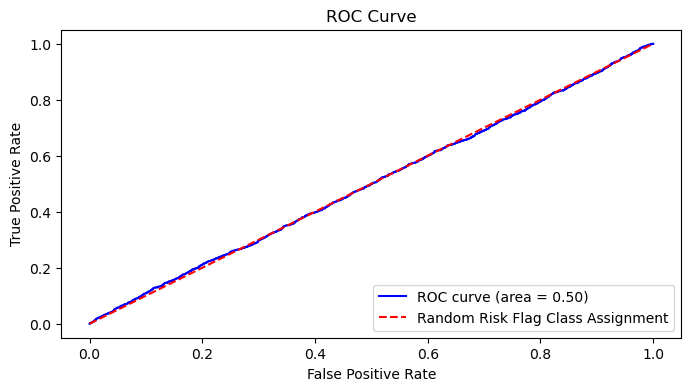

In [23]:
# 1. Accuracy 
it3_accuracy = accuracy_score(y_test, y_pred)
print("Iteration 3 Accuracy: ", it3_accuracy)

# 2. Confusion Matrix
it3_conf_matrix = confusion_matrix(y_test, y_pred)
print("Iteration 3 Confusion Matrix:", it3_conf_matrix)
print(it3_conf_matrix)

# 3. Precision, Recall, F1 Score 
it3_precision = precision_score(y_test, y_pred, zero_division=1)
it3_recall = recall_score(y_test, y_pred)
it3_f1 = f1_score(y_test, y_pred)
print("Iteration 3 Precision:", it3_precision)
print("Iteration 3 Recall:", it3_recall)
print("Iteration 3 F1 Score:", it3_f1)

# 4. ROC/AUC Score 

it3_roc_auc = roc_auc_score(y_test, y_prob)
print("Iteration 3 ROC AUC Score:", it3_roc_auc)

from sklearn.metrics import roc_curve, auc

# Calculate FPR, TPR, thresholds and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Risk Flag Class Assignment')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

RANDOM FOREST-------------------------------------------------------------------------------------------------------------------------------

Importing the necessary libraries that may be utilised

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, balanced_accuracy_score, matthews_corrcoef, confusion_matrix
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, StratifiedKFold

from sklearn.preprocessing import LabelEncoder

Loading & Validating Data

In [35]:
#Loading in the cleaned/prepared dataset from the data pre-processing step and assigning it to a dataframe 'loanData' 
loanData = pd.read_csv('cleanLoanData.csv')
loanData.head()

,Income,Age,Experience,Married.Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,...,ProfessionScientist,ProfessionSecretary,ProfessionSoftware_Developer,ProfessionStatistician,ProfessionSurgeon,ProfessionSurveyor,ProfessionTechnical_writer,ProfessionTechnician,ProfessionTechnology_specialist,ProfessionWeb_designer
0,1303834,23,3,0,1,0,Mechanical_engineer,Madhya_Pradesh,3,13,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,0,1,0,Software_Developer,Maharashtra,9,13,...,0,0,1,0,0,0,0,0,0,0
2,3991815,66,4,1,1,0,Technical_writer,Kerala,4,10,...,0,0,0,0,0,0,1,0,0,0
3,6256451,41,2,0,1,1,Software_Developer,Odisha,2,12,...,0,0,1,0,0,0,0,0,0,0
4,5768871,47,11,0,1,0,Civil_servant,Tamil_Nadu,3,14,...,0,0,0,0,0,0,0,0,0,0


Iteration 4 - Categorical Feature Inputs 

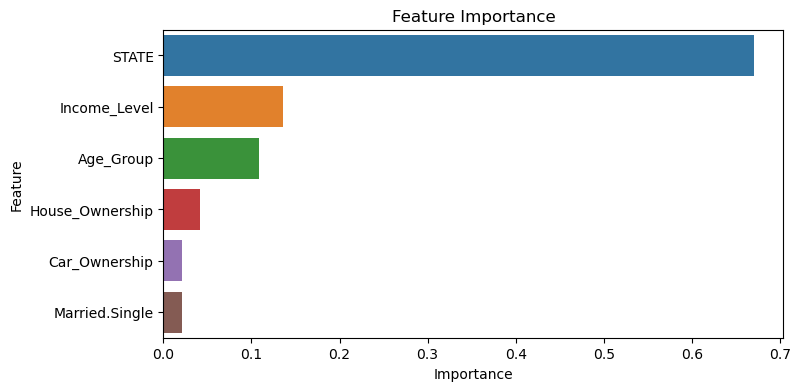

In [50]:
#Storing the categorical features in a input list
input_features = ['Income_Level', 'Age_Group', 'Married.Single', 'House_Ownership', 'Car_Ownership', 'STATE']

#Encoding the profession column and adding them to the input list 
profession_encoded_columns = [col for col in loanData.columns if col.startswith('Profession_')]
input_features.extend(profession_encoded_columns)

#Instantiating the input and output variables 
X = loanData[input_features].copy()
y = loanData['Risk_Flag'].values

#Encode categorical variables that cannot be processed in their default string format 
label_encoder = LabelEncoder()
categorical_columns = ['Income_Level', 'Age_Group','STATE']
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

#Converting input to array for Random Forest processing 
X = X.values

#Splitting the data into training/test subsets (30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Training the model and outputting predictions 
model_random_forest = RandomForestClassifier(random_state=0)
model_random_forest.fit(X_train, y_train)
y_pred = model_random_forest.predict(X_test)
y_prob = model_random_forest.predict_proba(X_test)[:, 1]

#Appling feature importances to model 
feature_importances = model_random_forest.feature_importances_

#Placing the feature importances in a dataframe 
import pandas as pd
import seaborn as sns

feature_importances_df = pd.DataFrame({
    'Feature': input_features,
    'Importance': feature_importances
})

#Sorting and plotting the features based on most important 
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance')
plt.show()


Iteration 4 Evaluation 

Iteration 4 Accuracy: 0.8781746031746032
Iteration 4 Confusion Matrix:
 [[65893   445]
 [ 8765   497]]
Iteration 4 Precision: 0.5276008492569002
Iteration 4 Recall: 0.053660116605484774
Iteration 4 F1 Score: 0.09741277930223442
Iteration 4 ROC AUC Score: 0.7217932458195756


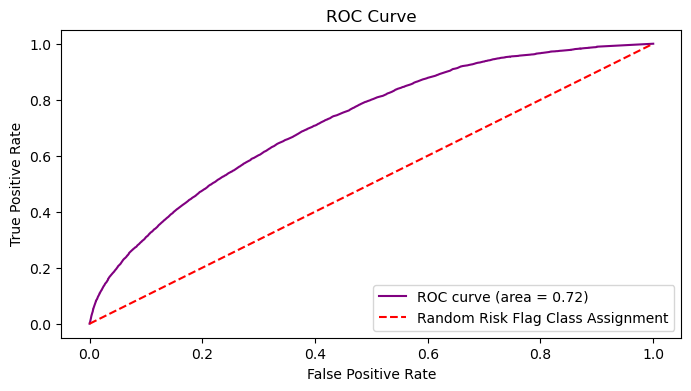

In [52]:
#1. Accuracy 

it4_accuracy = accuracy_score(y_test, y_pred)
print("Iteration 4 Accuracy:", it4_accuracy)

#2. Confusion Matrix 
it4_conf_matrix = confusion_matrix(y_test, y_pred)
print("Iteration 4 Confusion Matrix:\n", it4_conf_matrix)

# 3. Precision, Recall, F1 Score 
it4_precision = precision_score(y_test, y_pred, zero_division=1)
it4_recall = recall_score(y_test, y_pred)
it4_f1 = f1_score(y_test, y_pred)
print("Iteration 4 Precision:", it4_precision)
print("Iteration 4 Recall:", it4_recall)
print("Iteration 4 F1 Score:", it4_f1)

#4. ROC AUC Score 
it4_roc_auc = roc_auc_score(y_test, y_prob)
print("Iteration 4 ROC AUC Score:", it4_roc_auc)

from sklearn.metrics import roc_curve, auc

#Calculating the false positive rate, true positive rate, thresholds and ROC AUC score and then plotting results 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc2 = auc(fpr, tpr)

plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='purple', label=f'ROC curve (area = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Risk Flag Class Assignment')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Iteration 5 - Comprehensive Model with All Features 

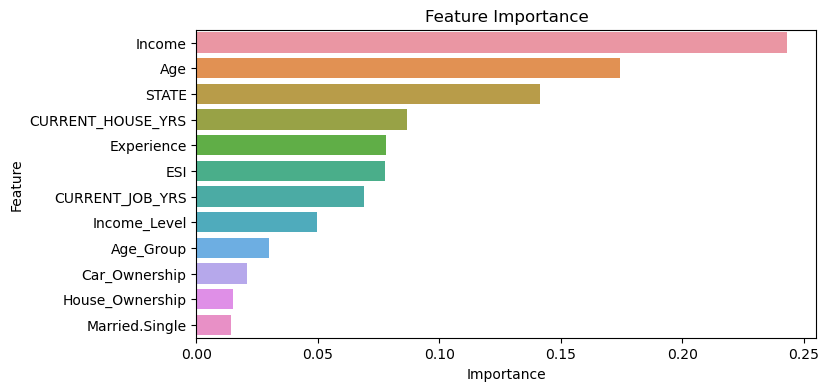

In [57]:
#Storing all of the features in an input list
input_features = ['Income', 'Income_Level', 'Age', 'Age_Group', 'Married.Single', 'House_Ownership', 'Car_Ownership', 
                 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Experience', 'ESI', 'STATE']

#Encoding the profession column and adding them to the input list
profession_encoded_columns = [col for col in loanData.columns if col.startswith('Profession_')]
input_features.extend(profession_encoded_columns)

#Instantiating the input and output variables 
X = loanData[input_features].copy()
y = loanData['Risk_Flag'].values

#Encode categorical variables that cannot be processed in their default string format 
label_encoder = LabelEncoder()
categorical_columns = ['Income_Level', 'Age_Group', 'STATE']
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

#Converting input to array for Random Forest processing 
X = X.values

#Split the dataset into training and test subsets (test data is 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Train the model and assigning predictions to variables 
model_random_forest = RandomForestClassifier(random_state=0)
model_random_forest.fit(X_train, y_train)
y_pred = model_random_forest.predict(X_test)
y_prob = model_random_forest.predict_proba(X_test)[:, 1]

#Appling feature importances to model and placing them in a dataframe
feature_importances = model_random_forest.feature_importances_

import pandas as pd
import seaborn as sns

feature_importances_df = pd.DataFrame({
    'Feature': input_features,
    'Importance': feature_importances
})

#Plotting the most important features 
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance')
plt.show()

Iteration 5 Evaluation 

Iteration 5 Accuracy: 0.8996825396825396
Iteration 5 Confusion Matrix:
 [[63055  3283]
 [ 4301  4961]]
Iteration 5 Precision: 0.6017709849587579
Iteration 5 Recall: 0.5356294536817102
Iteration 5 F1 Score: 0.5667771049925739
Iteration 5 ROC AUC Score: 0.937681482188294


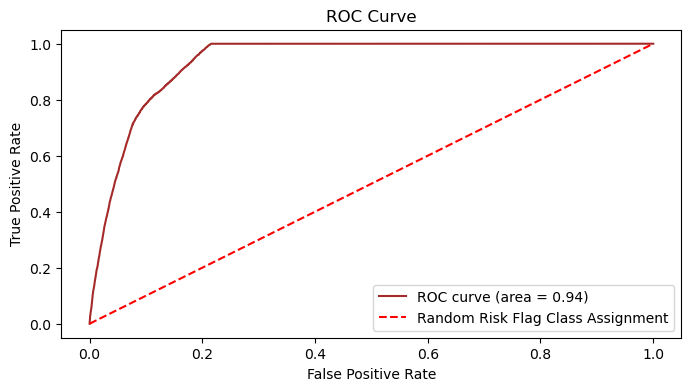

In [59]:
#1. Accuracy 

it5_accuracy = accuracy_score(y_test, y_pred)
print("Iteration 5 Accuracy:", it5_accuracy)

#2. Confusion Matrix 
it5_conf_matrix = confusion_matrix(y_test, y_pred)
print("Iteration 5 Confusion Matrix:\n", it5_conf_matrix)

# 3. Precision, Recall, F1 Score 
it5_precision = precision_score(y_test, y_pred, zero_division=1)
it5_recall = recall_score(y_test, y_pred)
it5_f1 = f1_score(y_test, y_pred)
print("Iteration 5 Precision:", it5_precision)
print("Iteration 5 Recall:", it5_recall)
print("Iteration 5 F1 Score:", it5_f1)

#4. ROC AUC Score 
it5_roc_auc = roc_auc_score(y_test, y_prob)
print("Iteration 5 ROC AUC Score:", it5_roc_auc)

from sklearn.metrics import roc_curve, auc

# Calculate FPR, TPR, thresholds and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc3 = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='brown', label=f'ROC curve (area = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Risk Flag Class Assignment')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Iteration 6 – Hypertuning Parameters with Comprehensive Model  

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 50, 'max_leaf_nodes': None, 'max_depth': None}


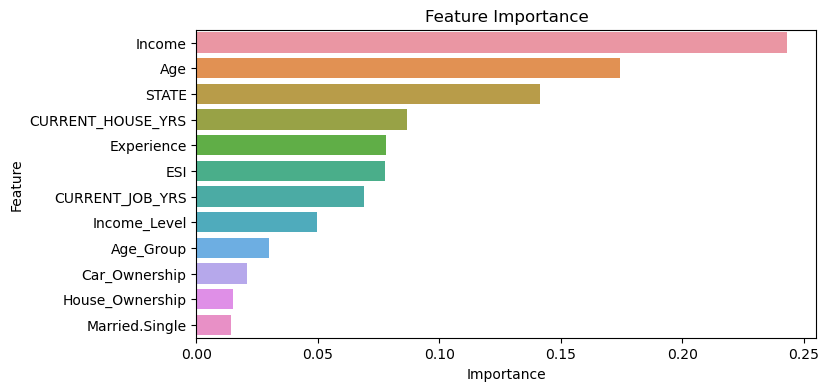

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


random_forest = RandomForestClassifier(random_state=0)

#Defining the 3 hyperparameters that are to be optimised (reducing number of estimators, setting max depth to trees, decreasing leaf node options)
parameters = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [10, 20, None],     
    'max_leaf_nodes': [10, 20, None] 
}

#Using the RandomizedSearchCV method to alter parameter combinations, define evaluation metrics, establish number of folds, optimising runtime)
randomized_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=parameters,
    n_iter=10,  
    scoring='roc_auc', 
    cv=3,  
    n_jobs=-1,  
    random_state=0,
    verbose=1  
)

#Fitting the results of the randomized search method on the training dataset and determining which hyperparameters are optimal 
randomized_search.fit(X_train, y_train)
best_parameters = randomized_search.best_params_
best_score = randomized_search.best_score_
print("Best Hyperparameters:", best_parameters)

#Training the model with the optimal hyperparameters and using them to make predictions on the test data 
best_random_forest = RandomForestClassifier(**best_parameters, random_state=0)
best_random_forest.fit(X_train, y_train)
y_pred = best_random_forest.predict(X_test)
y_prob = best_random_forest.predict_proba(X_test)[:, 1]

#Getting the feature importances
import pandas as pd
import seaborn as sns

feature_importances_df = pd.DataFrame({
    'Feature': input_features,
    'Importance': feature_importances
})

#Sorting and plotting the features by most importance 
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance')
plt.show()

Iteration 6 Evaluation 

Iteration 6 Accuracy: 0.8997089947089947
Iteration 6 Confusion Matrix:
 [[63027  3311]
 [ 4271  4991]]
Iteration 6 Precision: 0.6011804384485666
Iteration 6 Recall: 0.538868494925502
Iteration 6 F1 Score: 0.5683215668412662
Iteration 6 ROC AUC Score: 0.9376416138602828


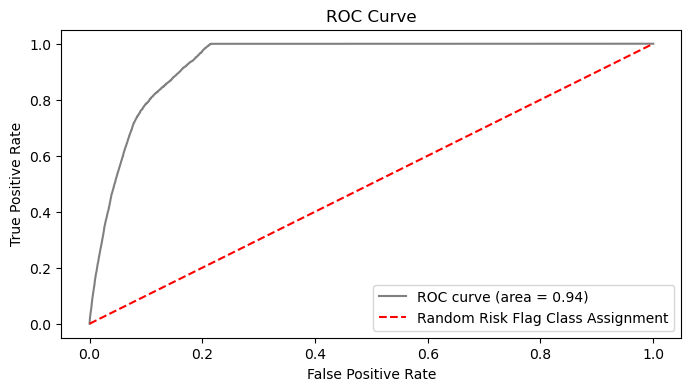

In [66]:
#1. Accuracy 

it6_accuracy = accuracy_score(y_test, y_pred)
print("Iteration 6 Accuracy:", it6_accuracy)

#2. Confusion Matrix 
it6_conf_matrix = confusion_matrix(y_test, y_pred)
print("Iteration 6 Confusion Matrix:\n", it6_conf_matrix)

# 3. Precision, Recall, F1 Score 
it6_precision = precision_score(y_test, y_pred, zero_division=1)
it6_recall = recall_score(y_test, y_pred)
it6_f1 = f1_score(y_test, y_pred)
print("Iteration 6 Precision:", it6_precision)
print("Iteration 6 Recall:", it6_recall)
print("Iteration 6 F1 Score:", it6_f1)

#4. ROC AUC Score 
it6_roc_auc = roc_auc_score(y_test, y_prob)
print("Iteration 6 ROC AUC Score:", it6_roc_auc)

from sklearn.metrics import roc_curve, auc

# Calculate FPR, TPR, thresholds and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc4 = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='grey', label=f'ROC curve (area = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Risk Flag Class Assignment')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()